[View in Colaboratory](https://colab.research.google.com/github/eventia/deepLearningOpenLecture/blob/master/numerical_diff.ipynb)

## 잘못된 미분함수


---


\begin{matrix}
f'(x) = {{f(x) - f(x-h)} \over {h}} , ~~~ h=0.00000000000000000000000000000000000000000000000001 
\end{matrix}

In [0]:
# 잘못된 수치미분 코드의 예
# h 값이 지나치게 작음 (프로그램에서 처리하기 곤란)

def numerical_diff_nu(f,x):
  h = 1e-50            # 0.00000000000000000000000000000000000000000000000001
  return (f(x+h)-f(x))/h


## 수치미분 함수의 표현
---
\begin{matrix}
f'(x) = {{f(x+h) - f(x-h)} \over {2h}}  ,~~~ h = 0.0001
\end{matrix}


In [0]:
# 수치미분 코드
# h 값을 프로그램에서 처리할 수 있을 정도로 크게하고
# 에러보정을 위해 f(x+h) - f(x-h) / 2h 를 사용

def numerical_diff(f,x):
  h = 1e-4             # 0.0001
  return (f(x+h)-f(x-h))/(2*h)

이차함수 
---
\begin{matrix}
y = 0.01x^2 + 0.1x 
\end{matrix}



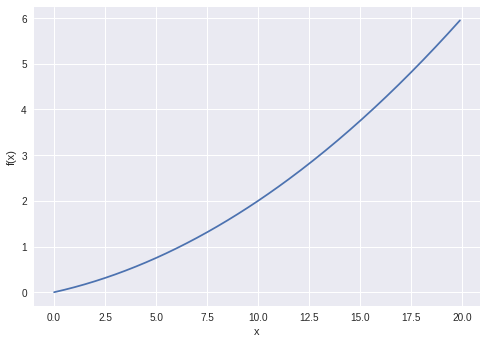

In [4]:
def function_1(x):
  return 0.01*x**2 + 0.1*x
  # f'(x) = 0.02x + 0.1

import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)
plt.show()

In [5]:
g1 = numerical_diff(function_1, 5)
g2 = numerical_diff(function_1, 10)
print(g1,g2)

d1 = numerical_diff_nu(function_1, 5)
d2 = numerical_diff_nu(function_1, 10)
print(d1,d2)


0.1999999999990898 0.2999999999986347
0.0 0.0


5 0.75 5.001 0.7502000100000001


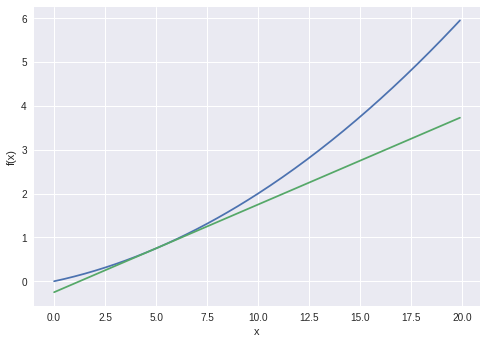

In [6]:
x = np.arange(0.0, 20.0, 0.1)

x1 = 5
x2 = x1 + .001
a = numerical_diff(function_1, 5)
y1 = function_1(x1)
y2 = function_1(x2)

print(x1,y1,x2,y2)

y = function_1(x)
# y = ax + b ... y-y1 = a(x-x1),  y = ax - ax1+y1
t = a*x - a*x1 + y1

plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y, x,t)
plt.show()

## 편미분 
---
\begin{matrix}
f(x_0, x_1) = x_0^2 + x_1^2 
\end{matrix}

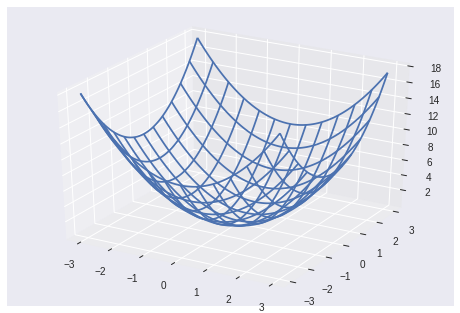

In [13]:
# 편미분
# f(x0,x1) = x0**2 + x1**2

def function_2(x):
  return x[0]**2 + x[1]**2

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# Grab some test data.
# X, Y, Z = axes3d.get_test_data(0.05)
X = np.arange(-3.0, 3.0, 0.05)
Y = np.arange(-3.0, 3.0, 0.05)
X, Y = np.meshgrid(X, Y)
Z = X**2 + Y**2

# Plot a basic wireframe.
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

plt.show()

In [14]:
# x0 = 3, x1 = 4 일때 편미분 @f/@x0

def function_tmp1(x0):
  return x0*x0 + 4.0 ** 2

numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [15]:
# x0 = 3, x1 = 4 일때 편미분 @f/@x1

def function_tmp2(x1):
  return 3.0**2 + x1*x1

numerical_diff(function_tmp2, 4.0)

7.999999999999119

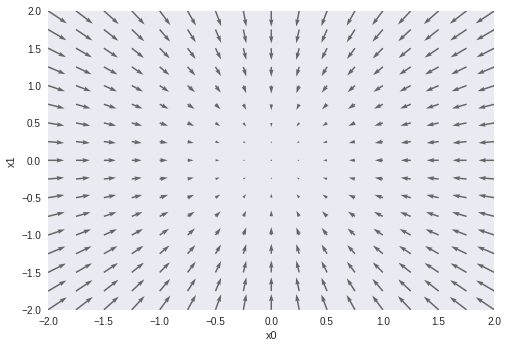

In [1]:
# f(x0,x1) 의 기울기

# coding: utf-8
# cf.http://d.hatena.ne.jp/white_wheels/20100327/p3
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    # plt.legend()
    plt.draw()
    plt.show()
